<a href="https://colab.research.google.com/github/donghyuun/deep-learning/blob/main/lab_09_1_2_Neural_Net_for_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 단층 뉴럴 네트워크 for Mnist

Training data shape (x_train): (60000, 28, 28)
Training labels shape (y_train): (60000,)
Test data shape (x_test): (10000, 28, 28)
Test labels shape (y_test): (10000,)


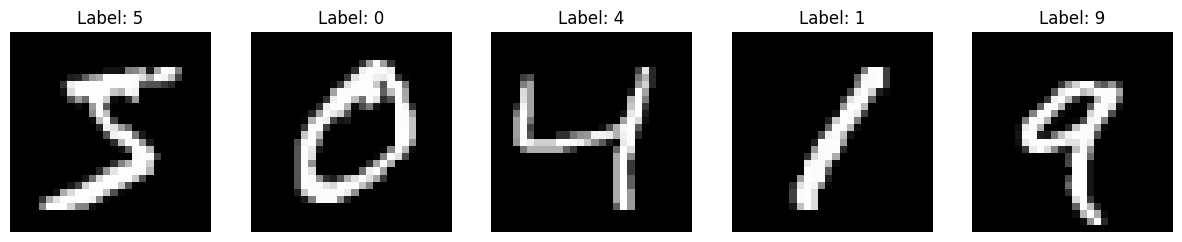

Epoch 1/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5795 - loss: 1.5664
Epoch 2/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8448 - loss: 0.6901
Epoch 3/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8622 - loss: 0.5567
Epoch 4/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8719 - loss: 0.4990
Epoch 5/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8806 - loss: 0.4602
Epoch 6/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8833 - loss: 0.4393
Epoch 7/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8891 - loss: 0.4189
Epoch 8/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8866 - loss: 0.4173
Epoch 9/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8939 - loss: 0.3936
Epoch 10/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8964 - loss: 0.3878
Epoch 11/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8977 - loss: 0.3762
Epoch 12/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

# MNIST 데이터셋 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터셋 형태 출력
print("Training data shape (x_train):", x_train.shape)  # (60000, 28, 28)
print("Training labels shape (y_train):", y_train.shape)  # (60000,)
print("Test data shape (x_test):", x_test.shape)  # (10000, 28, 28)
print("Test labels shape (y_test):", y_test.shape)  # (10000,)

# 훈련 데이터셋에서 첫 5개의 이미지와 레이블 시각화
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')
plt.show()

# 데이터 정규화: 픽셀 값을 0~1 범위로 변환
x_train, x_test = x_train / 255.0, x_test / 255.0

# 모델 정의
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten layer
    tf.keras.layers.Dense(10, activation='softmax')  # Dense layer with Softmax activation
])

# 모델 컴파일
model.compile(
    optimizer='SGD',  # Stochastic Gradient Descent
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Metric to evaluate performance
)

# 모델 학습: epochs=15, batch_size=100
model.fit(x_train, y_train, epochs=15, batch_size=100)

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# 가중치와 절편 출력
for layer in model.layers:
    if len(layer.get_weights()) > 0:  # 가중치와 절편이 있는 레이어만 처리
        weights, biases = layer.get_weights()  # 가중치(W)와 절편(b) 가져오기
        print("\nLayer:", layer.name)
        print("Weights (W):", weights.shape)
        print(weights)  # 가중치 값 출력
        print("Biases (b):", biases.shape)
        print(biases)  # 절편 값 출력


# 다층 뉴럴 네트워크 for Mnist (1개 은닉층, sigmoid 사용)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape (x_train): (60000, 28, 28)
Training labels shape (y_train): (60000,)
Test data shape (x_test): (10000, 28, 28)
Test labels shape (y_test): (10000,)


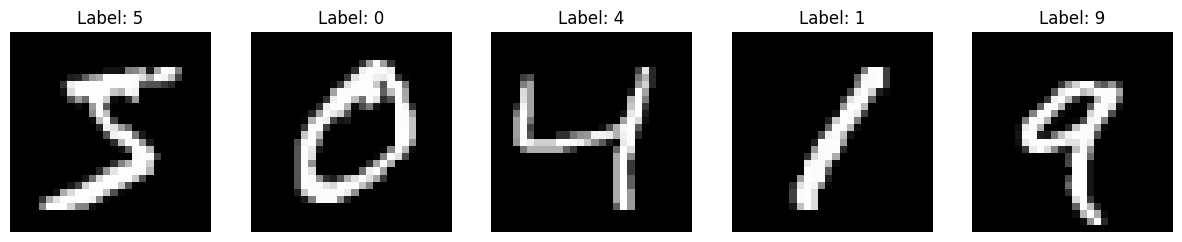

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4049 - loss: 2.1497
Epoch 2/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7531 - loss: 1.4827
Epoch 3/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8064 - loss: 1.0719
Epoch 4/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8334 - loss: 0.8469
Epoch 5/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8474 - loss: 0.7162
Epoch 6/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8599 - loss: 0.6306
Epoch 7/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8665 - loss: 0.5766
Epoch 8/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8729 - loss: 0.5340
Epoch 9/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8762 - loss: 0.5013
Epoch 10/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8832 - loss: 0.4749
Epoch 11/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8837 - loss: 0.4575
Epoch 12/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# MNIST 데이터셋 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터셋 형태 출력
print("Training data shape (x_train):", x_train.shape)  # (60000, 28, 28)
print("Training labels shape (y_train):", y_train.shape)  # (60000,)
print("Test data shape (x_test):", x_test.shape)  # (10000, 28, 28)
print("Test labels shape (y_test):", y_test.shape)  # (10000,)

# 훈련 데이터셋에서 첫 5개의 이미지와 레이블 시각화
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')
plt.show()

# 데이터 정규화: 픽셀 값을 0~1 범위로 변환
x_train, x_test = x_train / 255.0, x_test / 255.0

# 모델 정의 (은닉층에 ReLU 사용 안함)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten layer
    tf.keras.layers.Dense(128, activation='sigmoid'),  # 은닉층 (sigmoid 활성화)
    tf.keras.layers.Dense(10, activation='softmax')  # 출력층 (softmax 활성화)
])

# 모델 컴파일
model.compile(
    optimizer='SGD',  # Stochastic Gradient Descent
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Metric to evaluate performance
)

# 모델 학습: epochs=15, batch_size=100
model.fit(x_train, y_train, epochs=15, batch_size=100)

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# 가중치와 절편 출력
for layer in model.layers:
    if len(layer.get_weights()) > 0:  # 가중치와 절편이 있는 레이어만 처리
        weights, biases = layer.get_weights()  # 가중치(W)와 절편(b) 가져오기
        print("\nLayer:", layer.name)
        print("Weights (W):", weights.shape)
        print(weights)  # 가중치 값 출력
        print("Biases (b):", biases.shape)
        print(biases)  # 절편 값 출력


# 다층 뉴럴 네트워크 for Mnist (1개 은닉층, ReLU 사용)

Training data shape (x_train): (60000, 28, 28)
Training labels shape (y_train): (60000,)
Test data shape (x_test): (10000, 28, 28)
Test labels shape (y_test): (10000,)


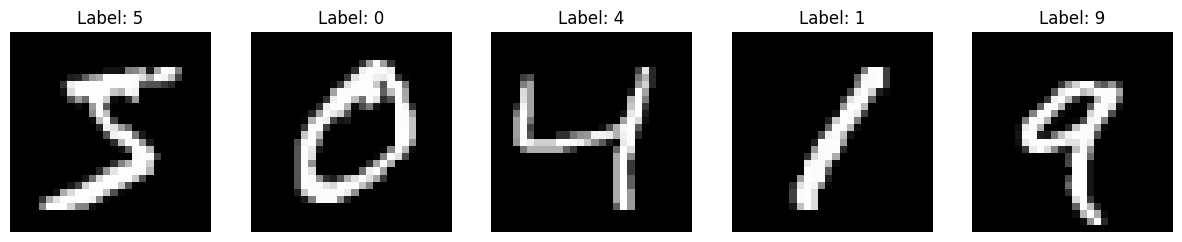

Epoch 1/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5955 - loss: 1.5099
Epoch 2/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8684 - loss: 0.5342
Epoch 3/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8910 - loss: 0.4126
Epoch 4/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8981 - loss: 0.3714
Epoch 5/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9054 - loss: 0.3420
Epoch 6/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9105 - loss: 0.3188
Epoch 7/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9145 - loss: 0.3078
Epoch 8/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9185 - loss: 0.2923
Epoch 9/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9226 - loss: 0.2755
Epoch 10/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9247 - loss: 0.2711
Epoch 11/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9262 - loss: 0.2610
Epoch 12/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

# MNIST 데이터셋 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터셋 형태 출력
print("Training data shape (x_train):", x_train.shape)  # (60000, 28, 28)
print("Training labels shape (y_train):", y_train.shape)  # (60000,)
print("Test data shape (x_test):", x_test.shape)  # (10000, 28, 28)
print("Test labels shape (y_test):", y_test.shape)  # (10000,)

# 훈련 데이터셋에서 첫 5개의 이미지와 레이블 시각화
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')
plt.show()

# 데이터 정규화: 픽셀 값을 0~1 범위로 변환
x_train, x_test = x_train / 255.0, x_test / 255.0

# 모델 정의 (은닉층에 ReLU 사용)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten layer
    tf.keras.layers.Dense(128, activation='relu'),  # 은닉층 (ReLU 활성화)
    tf.keras.layers.Dense(10, activation='softmax')  # 출력층 (Softmax 활성화)
])

# 모델 컴파일
model.compile(
    optimizer='SGD',  # Stochastic Gradient Descent
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Metric to evaluate performance
)

# 모델 학습: epochs=15, batch_size=100
model.fit(x_train, y_train, epochs=15, batch_size=100)

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# 가중치와 절편 출력
for layer in model.layers:
    if len(layer.get_weights()) > 0:  # 가중치와 절편이 있는 레이어만 처리
        weights, biases = layer.get_weights()  # 가중치(W)와 절편(b) 가져오기
        print("\nLayer:", layer.name)
        print("Weights (W):", weights.shape)
        print(weights)  # 가중치 값 출력
        print("Biases (b):", biases.shape)
        print(biases)  # 절편 값 출력


## 다층 뉴럴 네트워크 for Mnist (3개 은닉층, ReLU 사용)

Training data shape (x_train): (60000, 28, 28)
Training labels shape (y_train): (60000,)
Test data shape (x_test): (10000, 28, 28)
Test labels shape (y_test): (10000,)


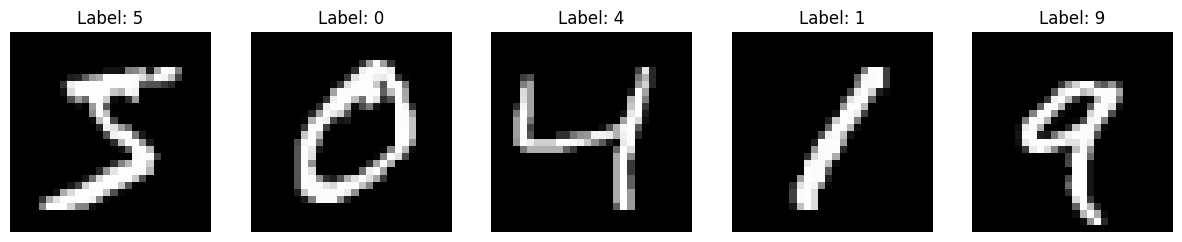

Epoch 1/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4522 - loss: 1.8230
Epoch 2/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8610 - loss: 0.5033
Epoch 3/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8950 - loss: 0.3700
Epoch 4/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9067 - loss: 0.3185
Epoch 5/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9186 - loss: 0.2877
Epoch 6/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9244 - loss: 0.2643
Epoch 7/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9309 - loss: 0.2387
Epoch 8/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9377 - loss: 0.2175
Epoch 9/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9412 - loss: 0.1996
Epoch 10/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9464 - loss: 0.1875
Epoch 11/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9493 - loss: 0.1768
Epoch 12/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

# MNIST 데이터셋 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터셋 형태 출력
print("Training data shape (x_train):", x_train.shape)  # (60000, 28, 28)
print("Training labels shape (y_train):", y_train.shape)  # (60000,)
print("Test data shape (x_test):", x_test.shape)  # (10000, 28, 28)
print("Test labels shape (y_test):", y_test.shape)  # (10000,)

# 훈련 데이터셋에서 첫 5개의 이미지와 레이블 시각화
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')
plt.show()

# 데이터 정규화: 픽셀 값을 0~1 범위로 변환
x_train, x_test = x_train / 255.0, x_test / 255.0

# 모델 정의 (은닉층 2개 추가)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten layer
    tf.keras.layers.Dense(128, activation='relu'),  # 첫 번째 은닉층
    tf.keras.layers.Dense(64, activation='relu'),   # 두 번째 은닉층 (추가된 레이어)
    tf.keras.layers.Dense(32, activation='relu'),   # 세 번째 은닉층 (추가된 레이어)
    tf.keras.layers.Dense(10, activation='softmax') # 출력층 (Softmax 활성화)
])

# 모델 컴파일
model.compile(
    optimizer='SGD',  # Stochastic Gradient Descent
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Metric to evaluate performance
)

# 모델 학습: epochs=15, batch_size=100
model.fit(x_train, y_train, epochs=15, batch_size=100)

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# 가중치와 절편 출력
for layer in model.layers:
    if len(layer.get_weights()) > 0:  # 가중치와 절편이 있는 레이어만 처리
        weights, biases = layer.get_weights()  # 가중치(W)와 절편(b) 가져오기
        print("\nLayer:", layer.name)
        print("Weights (W):", weights.shape)
        print(weights)  # 가중치 값 출력
        print("Biases (b):", biases.shape)
        print(biases)  # 절편 값 출력


# 다층 뉴럴 네트워크 for Mnist (3개 은닉층, ReLU 사용, 뉴런 수 추가)

Training data shape (x_train): (60000, 28, 28)
Training labels shape (y_train): (60000,)
Test data shape (x_test): (10000, 28, 28)
Test labels shape (y_test): (10000,)


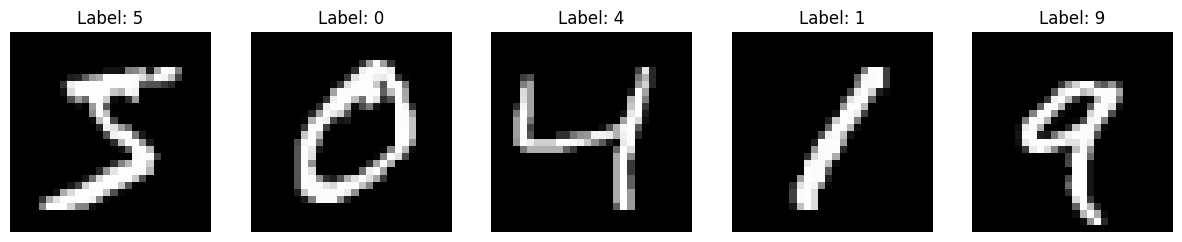

Epoch 1/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5417 - loss: 1.6859
Epoch 2/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8897 - loss: 0.4162
Epoch 3/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9126 - loss: 0.3113
Epoch 4/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9230 - loss: 0.2690
Epoch 5/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9301 - loss: 0.2444
Epoch 6/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9408 - loss: 0.2125
Epoch 7/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9445 - loss: 0.1957
Epoch 8/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9484 - loss: 0.1825
Epoch 9/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9523 - loss: 0.1649
Epoch 10/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9561 - loss: 0.1574
Epoch 11/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9585 - loss: 0.1481
Epoch 12/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 5

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt

# MNIST 데이터셋 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터셋 형태 출력
print("Training data shape (x_train):", x_train.shape)  # (60000, 28, 28)
print("Training labels shape (y_train):", y_train.shape)  # (60000,)
print("Test data shape (x_test):", x_test.shape)  # (10000, 28, 28)
print("Test labels shape (y_test):", y_test.shape)  # (10000,)

# 훈련 데이터셋에서 첫 5개의 이미지와 레이블 시각화
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')
plt.show()

# 데이터 정규화: 픽셀 값을 0~1 범위로 변환
x_train, x_test = x_train / 255.0, x_test / 255.0

# 모델 정의 (은닉층 3개)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten layer
    tf.keras.layers.Dense(512, activation='relu'),  # 첫 번째 은닉층 (512개의 뉴런)
    tf.keras.layers.Dense(256, activation='relu'),  # 두 번째 은닉층 (256개의 뉴런)
    tf.keras.layers.Dense(128, activation='relu'),  # 세 번째 은닉층 (128개의 뉴런)
    tf.keras.layers.Dense(10, activation='softmax') # 출력층 (10개의 클래스)
])

# 모델 컴파일
model.compile(
    optimizer='SGD',  # Stochastic Gradient Descent
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Metric to evaluate performance
)

# 모델 학습: epochs=15, batch_size=100
model.fit(x_train, y_train, epochs=15, batch_size=100)

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# 가중치와 절편 출력
for layer in model.layers:
    if len(layer.get_weights()) > 0:  # 가중치와 절편이 있는 레이어만 처리
        weights, biases = layer.get_weights()  # 가중치(W)와 절편(b) 가져오기
        print("\nLayer:", layer.name)
        print("Weights (W):", weights.shape)
        print(weights)  # 가중치 값 출력
        print("Biases (b):", biases.shape)
        print(biases)  # 절편 값 출력
